Import the packages you need. 
The notebook only requires astropy.io.fits, but subprocess and copy are useful. Please do not use extra packages without checking with the instructors.

In [168]:
#!/usr/bin/env python
%pylab inline
from astropy.io import fits
import subprocess
import copy
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


Please follow all tutorial instructions for displaying text and images. The outputs that will be graded are those labeled with a Q. For the graded boxes, if an image is asked for make sure it is labeled. If text is asked for, clearly label it and include units, following the example below:

In [169]:
# example, if Question is "write the V magnitude of the standard star" your output might look like the following
Vmag=12.43
print('Vmag of standard star:',Vmag,'magnitudes')

Vmag of standard star: 12.43 magnitudes


Note on displaying images: It is straight-forward to display images with matplotlib using plt.imshow(imagename). A few keywords you will find useful are "vmax" and "vmin" which set the image scaling (max and min value). Please also always use the keyword origin='lower', which sets pixel (0,0) in the lower left corner. Example: plt.imshow(imagename,vmax=8000,origin='lower')

Display the list of available data files.
data_dir is the directory containing the fits files.

In [170]:
directory = subprocess.os.getcwd() + "\\data"
os.listdir(path = directory)
file_array = os.listdir(path = directory) #the first and last entries aren't fits files
print(file_array)

['data', 'lris0136.fits', 'lris0137.fits', 'lris0139.fits', 'lris0140.fits', 'lris0147.fits', 'lris0148.fits', 'lris0151.fits', 'lris0152.fits', 'lris0153.fits', 'lris0154.fits', 'lris0155.fits', 'lris0156.fits', 'lris0157.fits', 'lris0158.fits', 'lris0159.fits', 'lris0160.fits', 'lris0161.fits', 'lris0162.fits', 'lris0167.fits', 'lris0172.fits', 'lris0173.fits', 'lris0174.fits', 'lris0175.fits', 'lris0176.fits', 'lris0177.fits', 'lris0178.fits', 'lris0179.fits', 'lris0180.fits', 'lris0181.fits', 'lris0182.fits', '__MACOSX']


# Part I: Orienting yourself to the dataset.

Explore the fits header keywords, display the header with keywords and their values, and think about what they all represent.
For working with fits files: https://docs.astropy.org/en/stable/io/fits/index.html

In [171]:
index = 2
path = directory + "\\" + file_array[index]
hdul = fits.open(path);
print(hdul[0].header)
hdul.close();

SIMPLE  =                    T / file conforms to FITS standard?                BITPIX  =                   16 / number of bits per data pixel                  NAXIS   =                    2 / number of data axes                            NAXIS1  =                 2250 / length of data axis   1                        NAXIS2  =                 2048 / length of data axis   2                        TRAPDOOR= 'open    '           /                                                SLITNAME= 'direct  '           /                                                SLITMASK=                    1 /                                                GRANAME = 'mirror  '           /                                                GRATING =                    1 /                                                GRANGLE =          13.47489071 /                                                REDFILT = 'R       '           /                                                REDFNUM =                    5 /        

# Q1: Print out a log table in-line:
For each file, the table should include: The file name, the UT time, the target RA and DEC, the target name, the object name, the airmass, the filter, and the exposure time.
Make sure your table has a title on every column, including units when relevant.
Note: Target name is added automatically to the fits header by the instrument, Object name is added manually by the observer. It's useful to look at both because they may contain slightly different information, and if they disagree for a given file you need to figure out why and which is correct (there are many reasons why one or the other may be incorrect).

In [172]:
ut_time = [""] * (len(file_array) - 2)
ra = [""] * (len(file_array) - 2)
dec = [""] * (len(file_array) - 2)
airmass = [""] * (len(file_array) - 2)
object_name = [""] * (len(file_array) - 2)
target_name = [""] * (len(file_array) - 2)

for index in range(len(file_array)):
    path = directory + "\\" + file_array[index]
    if(index > 0 and index < len(file_array) - 1):
            hdul = fits.open(path);
            ra[index - 1] = hdul[0].header['RA']
            dec[index - 1] = hdul[0].header['DEC']
            ut_time[index - 1] = hdul[0].header['UT']   
            target_name[index - 1] = hdul[0].header['TARGNAME']
            object_name[index - 1] = hdul[0].header['Object']
            airmass[index - 1] = hdul[0].header['AIRMASS']
            hdul.close();
table = np.array((ra, dec, ut_time, target_name, object_name, airmass))
length_test = [True] * len(table)
for index in range(len(table)):
    length_test[index] = (len(file_array) - 2 == (len(table[index]))) 
    #two of the files are not fits files
print("It is",  all(length_test), 
      "that each header has all of the information we need")
print("Table of relevant information from each header:\n", table)

It is True that each header has all of the information we need
Table of relevant information from each header:
 [['18:58:31.70' '18:58:31.70' '18:58:31.70' '18:58:31.70' '18:42:45.00'
  '18:42:45.00' '20:37:14.10' '20:36:50.00' '20:18:42.50' '20:18:42.50'
  '20:18:42.50' '20:18:42.50' '21:41:57.60' '21:41:57.60' '21:41:57.60'
  '21:41:57.60' '21:41:57.60' '21:41:57.60' '23:29:34.02' '04:29:24.00'
  '04:29:24.00' '04:29:24.00' '04:29:24.00' '04:29:24.00' '04:29:24.00'
  '04:29:24.00' '04:29:24.00' '04:29:24.00' '04:29:24.00' '04:29:24.00']
 ['-37:01:30.0' '-37:01:30.0' '-37:01:30.0' '-37:01:30.0' '+00:07:42.0'
  '+00:07:42.0' '+42:12:12.0' '+42:26:58.0' '+41:12:20.0' '+41:12:20.0'
  '+41:12:20.0' '+41:12:20.0' '+65:53:07.1' '+65:53:07.1' '+65:53:07.1'
  '+65:53:07.1' '+65:53:07.1' '+65:53:07.1' '-23:55:53.8' '+48:00:00.0'
  '+48:00:00.0' '+48:00:00.0' '+48:00:00.0' '+48:00:00.0' '+48:00:00.0'
  '+48:00:00.0' '+48:00:00.0' '+48:00:00.0' '+48:00:00.0' '+48:00:00.0']
 ['11:18:38.38' '11:20

The files in this set include flat fields and science fields. Display at least one of the science fields to orient yourself to what raw data looks like.
Note: When reading in the fits data, always convert the datatype to float, e.g.: im = np.array(im,dtype='float'). Otherwise your math on the images later in the notebook will produce strange results.

In [173]:
index = 2
path = directory + "\\" + file_array[index]
hdul = fits.open(path);
print("Object observed:", hdul[0].header['Object'])
data = np.array(hdul[0].data, dtype='float')
shape = data.shape
shape_check = [True] * len(shape)
for dim in range(len(shape)):
    shape_check = (shape[dim] > 12)
print("The data is of size", shape)
print("Top left corner of the data table:\n", 
      data[0:11, 0:11])
print("Bottom right corner of the data table:\n", 
      data[shape[0] - 11 : shape[0] - 1, shape[1] - 11:shape[1] - 1])
hdul.close();

Object observed: rcra
The data is of size (2048, 2250)
Top left corner of the data table:
 [[1003.    0.  999. 1001. 1000. 1002. 1000.  998. 1004. 1000. 1004.]
 [1003.    0.  995.  995. 1003. 1005. 1004.  998.  999. 1005. 1006.]
 [1003.    0.  993.  994. 1000. 1001. 1004.  997. 1001. 1003. 1009.]
 [1003.    0.  997. 1000. 1001.  998. 1002. 1004. 1003. 1002. 1001.]
 [1004.    0.  996.  997. 1001. 1003. 1003.  998. 1005. 1000. 1006.]
 [1001.    0. 1000.  993. 1006.  999.  997. 1004.  999. 1007. 1004.]
 [1001.    0.  996. 1000.  998. 1002. 1000. 1001. 1000. 1006. 1000.]
 [1010.    0.  998. 1003. 1005. 1001.  997. 1002. 1002. 1001. 1002.]
 [1004.    0.  991.  997.  996. 1002. 1000. 1007. 1001. 1001. 1000.]
 [ 998.    0.  996.  995. 1000.  999.  998. 1008. 1005. 1006. 1006.]
 [1007.    0.  998.  999. 1003.  997.  996. 1007.  998. 1003. 1008.]]
Bottom right corner of the data table:
 [[1098. 1097. 1099. 1095. 1095. 1094. 1100. 1097. 1100. 1095.]
 [1098. 1096. 1095. 1094. 1096. 1095. 1094. 10

# Part II: Basic Calibrations: Bias, Dark, Flat

Display one of the flat fields. Title the figure with "FLAT" and the filter name. Make sure you understand the various aspects of the image and why it looks the way it does.

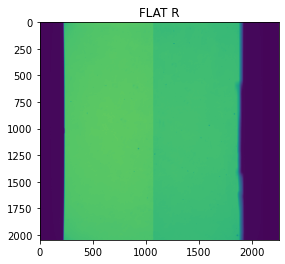

In [190]:
index = len(file_array) - 2
path = directory + "\\" + file_array[index]
hdul = fits.open(path);
data = np.array(hdul[0].data, dtype='float')
shape = data.shape
shape_check = [True] * len(shape)
for dim in range(len(shape)):
    shape_check = (shape[dim] > 12)
plt.imshow(data)
plt.title("FLAT " + hdul[0].header['REDFILT'])
hdul.close();

Identify the column number that marks the divide between the two halves of the CCD (with different amplifiers)

In [194]:
max = 0
left = 500
right = 1500
diff = np.arange(left, right)
for col in range(left, right):
    diff[col - right] = np.average(data[:, col])
    diff[col - right] -= np.average(data[:, col + 1])
dividing_column = np.argmax(diff) + left
print("The two halves of the CCD with different amplifiers are separated by column", dividing_column)

The two halves of the CCD with different amplifiers are separated by column 1065


Identify the columns and rows that contain the two overscan regions for each detector half. This is most easily done by displaying a median average horizontal profile averaged over the entire frame. The overscan regions are the two stripes down the right side between roughly columns 2100 and 2250. The left overscan region has the bias+dark level for the left side of the detector. The right overscan region has the bias+dark level for the left side of the detector.

# Q2a: Write down the column number that divides the two detector halves, and the column numbers containing the left and right overscan region.

Now you're going to create a clean, normalized  "master flat field" for each filter. To do this, for each flat: (1) subtract the bias+dark level then crop out the un-illuminated region of the detector, (2) median-average all flat frames within each filter, and
(3) normalize the master flat so that its median value is 1. Note 1: make sure that all the flat fields you're using to make the master have the same exposure time. Note 2: Make sure you have viewed every image you're using and that it looks as expected. For a flat field, "as expected" means that all flats using a given filter have roughly the same counts, those counts are much higher than the bias level, and there are no astronomical sources in the field. Log files and fits headers have been known to be incorrect.

# Q2b: Display your final normalized master flat fields with colorbars. Title each plot with "Master Flat" plus the filter name

# Part III: Photometric Calibration

For the flux calibration of the images, you will be using standard star SA 110 361.
Go to https://www.eso.org/sci/observing/tools/standards/Landolt.html, and find 110 361, display the gif.
Use the chart to identify which star is 361.
Pay attention to the scale bar to orient relative scales. You will want to know the size of your image in arcminutes

# Q3a: Using the link above, write down the magnitudes of star 110 361 in each of your observing filters.

# Q3b: Express these magnitudes in flux densities in units of W/m^2/micron. Use zero-magnitude flux densities of: R: 1.738e-8 W/m2/um, I: 8.318e-9 W/m2/um

Next, you will need to use aperture photometry to determine the brightness of the star in both filters in units of detector counts per second. This will enable you to derive a conversion factor between counts/second and physical flux density that will be applied to your scientific targets.

Starting with one filter, do the bias and flat correction on the standard star field and display the corrected image

# Q3c. Write down the pixel coordinates of the center of the standard star

Now, perform aperture photometry on the standard star to determine its brightness in counts/second. When choosing your three radii for aperture photometry, first explore the outer two radii, making sure the chosen background annulus does not contain any sources nor significant flux from the star. Then, for every aperture photometry operation in this notebook, you will need to include a plot of counts/sec vs. inner radius (in pixels), to show where the curve levels off and demonstrate the counts/sec value you've chosen. Note: you will need to divide by exposure time to get to "per second".

You may find the function below useful for implementing the aperture photometry: The function takes an image and an (x,y) coordinate pair, and outputs a new image where the value of every pixel is the distance in pixels between that pixel and the input coordinate.

In [5]:
def dist(xcoord,ycoord,image):
    xx = np.arange((image.shape[0]))
    xim = np.repeat(xx,image.shape[1]).reshape(image.shape) # xcoordinate of each pixel
    yy = np.arange((image.shape[1]))
    yim = np.tile(yy,image.shape[0]).reshape(image.shape) #ycoordinate of each pixel
    dist = np.sqrt((xim-xcoord)**2.+(yim-ycoord)**2.)
    return(dist)

Repeat for second filter. Note that the standard star may not be at the exact same location between filters.

# Q3d: Display a plot of Counts/sec of the star vs. Inner radius in pixels, for each filter. Label each with the filter name. Write down the counts/second of the star in each filter (labeled by filter), and the conversion factor in units of (W/m^2/micron)/(counts/sec) for each filter. These conversion factors are the final step of the flux calibration.

# Part IV. Scientific image analysis

We will be using the field NGC 7129. Start by displaying a couple of the images to see how they differ. Note that there are images with different exposure times. You will need to make sure the stars you are using in this section are not saturated. Using the shorter exposure time images will allow you to measure brighter stars, while the longer exposure times will allow you to measure the fainter stars.

To orient yourself to the field, find a picture of star-forming region NGC 7219 online. e.g. https://noirlab.edu/public/images/noao-ngc7129/
and orient yourself to which part of the nebula your data is of.
Note: you may want to look at the header keywords:
ROTMODE: position angle means rotation angle of the image east of north.
ROTPPOSN is the value of the rotation angle.

# Q4a: Choose 5 stars. For each star you've chosen, display the plots of (Counts/sec) vs. Inner radius in pixels, and write down its total brightness in counts/sec. Repeat for each filter.

# Q4b: Create a plot containing the spectrum of each star. Ror each of your 5 stars, there should be a point for each filter with the x-coordinate the filter wavelength and the y-coordinate the flux density, converted from counts/sec using your photometry conversion factor. Each star should be labeled, the plot should have a legend, and x and y axes should have units and labels.

# Q4c: Create a color-magnitude diagram of your cluster stars, with color (i.e. difference in magnitudes between the two filters) on the x-axis, and the magnitude in one of the filters on the y-axis. Based on this, can you make any guesses on which of your chosen stars belong to the cluster?

These data are published in Dahm and Hillenbrand (2015), you can find the full color-magnitude diagram including many more sources than your analysis in Figure 3 of this paper: https://iopscience.iop.org/article/10.1088/0004-6256/149/6/200/pdf 